# Лабораторная работа №7 по курсу "Методы и средства передачи информации"

_Выполнил студент группы А-07-18 Востриков Роман_

## Задание 1
Двоичный (8,4) код задан порождающей матрицей:
$$
G =
\begin{pmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 1 & 1 & 0 & 0\\
0 & 0 & 1 & 1 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0
\end{pmatrix}
$$
Используя соотношение $А = -(-А^T)^T$. Оттуда найти матрицу $H = ( А | E )$, где $E$- единичная матрица. Определить произведение $G$ и $H^T$

А) Составить программу, которая выводит все кодовые слова и определяет кодовое расстояние.

Б) Привести матрицу $G$ с помощью эквивалентных преобразований к виду $(E|-A^T)$



### Решение

#### A)

In [1]:
import numpy as np # библиотека для производительных матричных операций

In [38]:
# вспомогательная функция для приведения массива двоичных цифр к строковому представлению
def stringify(arr):
    return np.array2string(arr, separator='')[1:-1]

In [31]:
G = np.array([[1, 1, 1, 0, 1, 0, 0, 0],
              [0, 1, 0, 1, 1, 1, 0, 0],
              [0, 0, 1, 1, 0, 1, 0, 1],
              [1, 0, 0, 1, 1, 0, 1, 1]])

In [16]:
# получение всех сообщений указанной длины
def all_messages(length):
    words =[i for i in range(0, 2**length)]
    strings =["{0:b}".format(i).zfill(length) for i in words]
    bits = [np.array(list(map(int, str))) for str in strings]
    return bits

In [1]:
# получение всех кодовых слов для данной порождающей матрицы
def all_codewords(G):
    length = G.shape[0]
    messages = all_messages(length)
    words = [np.mod(x @ G, 2) for x in messages]
    return words

In [ ]:
np.array([1, 0, 0, 1])

Выведем все кодовы слов для матрицы $G$:

In [62]:
w = all_codewords(G) # таблица кодовых слов для определения расстояния

p = zip(map(stringify,all_messages(4)), map(stringify, w))
for m, c in p:
    print(m," - ",c)

0000  -  00000000
0001  -  00011101
0010  -  00100111
0011  -  00111010
0100  -  01001110
0101  -  01010011
0110  -  01101001
0111  -  01110100
1000  -  10000111
1001  -  10011010
1010  -  10100000
1011  -  10111101
1100  -  11001001
1101  -  11010100
1110  -  11101110
1111  -  11110011


Найдем кодовое расстояние как минимальный вес кодовых слов, не включая первого, содержащего только 0. 

In [51]:
# определение веса как количества единиц в кодовом слове
def code_weight(word):
    return np.count_nonzero(word)

In [55]:
# определение кодового расстояния 
def code_distance(words):
    return min(map(code_weight, words[1:]))

In [59]:
print("Кодовое расстояние: ", code_distance(w))

Кодовое расстояние:  2


#### Б)

$$
G = 
\begin{pmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 1 & 1 & 0 & 0\\
0 & 0 & 1 & 1 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0
\end{pmatrix}
\stackrel{\begin{array}{c}j_4\leftrightarrow j_7,\\ 
j_3\leftrightarrow j_8\end{array}}{\sim}
\begin{pmatrix}
1 & 1 & 0 & 0 & 1 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 1 & 1\\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0
\end{pmatrix}
\stackrel{i_1-i_2}{\sim}
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 1 & 1 & 1\\
0 & 1 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 1 & 1\\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0
\end{pmatrix}
\stackrel{i_4-i_1}{\sim}
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 1 & 1 & 1\\
0 & 1 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 1 & 1\\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 1
\end{pmatrix}
$$

Откуда 
$$
-A^T = 
\begin{pmatrix}
0 & 1 & 1 & 1\\
1 & 1 & 1 & 0\\
0 & 1 & 1 & 1\\
1 & 1 & 0 & 1
\end{pmatrix}
$$

$$
A = 
\begin{pmatrix}
0 & 1 & 0 & 1\\
1 & 1 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 0 & 1 & 1
\end{pmatrix}
$$

Зная $A$, можно записать проверочную матрицу $H$:
$$
H= (A | E) =
\begin{pmatrix}
0 & 1 & 0 & 1 & 1 & 0 & 0 & 0\\
1 & 1 & 1 & 1 & 0 & 1 & 0 & 0\\
1 & 1 & 1 & 0 & 0 & 0 & 1 & 0\\
1 & 0 & 1 & 1 & 0 & 0 & 0 & 1
\end{pmatrix}
$$

Покажем, что $H$ действительно является проверочной для $G$, для этого перемножим $G$ (преобразованную) и $H^T$:

In [4]:
G = np.array([[1, 0, 0, 0, 0, 1, 1, 1],
              [0, 1, 0, 0, 1, 1, 1, 0],
              [0, 0, 1, 0, 0, 1, 1, 1],
              [0, 0, 0, 1, 1, 1, 0, 1]])

H = np.array([[0, 1, 0, 1, 1, 0, 0, 0],
              [1, 1, 1, 1, 0, 1, 0, 0],
              [1, 1, 1, 0, 0, 0, 1, 0],
              [1, 0, 1, 1, 0, 0, 0, 1]])

np.mod(G @ H.T, 2)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

## Задание 2
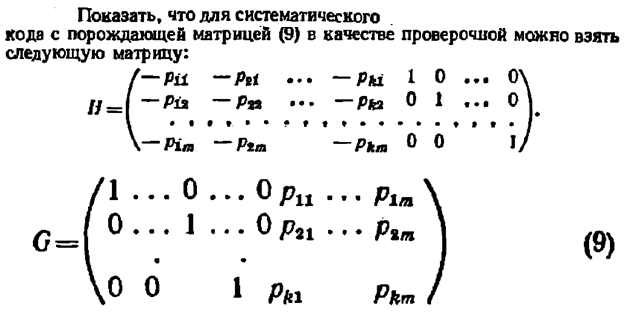

### Решение
Покажем, что в качестве проверочной матрицы для $G$ можно взять $H$, перемножив $G$ и $H^T$:
$$
GH^T = 
\begin{pmatrix}
1 & \ldots & 0 &\ldots & 0 & p_{11} & \ldots & p_{1m} \\
0 & \ldots & 1 &\ldots & 0 & p_{21} & \ldots & p_{2m} \\
\cdots&\cdots&\cdots&\cdots&\cdots&\cdots&\cdots&\cdots\\
0 & \ldots & 0 &\ldots & 1 & p_{k1} & \ldots & p_{km} 
\end{pmatrix} \cdot
\begin{pmatrix}
-p_{11} & -p_{12} & \ldots & -p_{1m} \\
-p_{11} & -p_{12} & \ldots & -p_{1m} \\
\cdots  & \cdots  & \cdots & \cdots \\
-p_{11} & -p_{12} & \ldots & -p_{1m} \\
1       &   0     & \ldots &   0 \\
0       &   1     & \ldots &   0 \\
\cdots  & \cdots  & \cdots & \cdots \\
0       &\ldots   &   0    &   1 \\
\end{pmatrix}
=
\begin{pmatrix}
-p_{11} + p_{11} & -p_{12} + p_{12} & \ldots & -p_{1m} + p_{1m} \\
-p_{21} + p_{21} & -p_{22} + p_{22} & \ldots & -p_{2m} + p_{2m} \\
     \cdots      &      \cdots      & \cdots &      \cdots      \\
-p_{k1} + p_{k1} & -p_{k2} + p_{k2} & \ldots & -p_{km} + p_{km} \\
\end{pmatrix}
=0
$$

Произведение $GH^T$ есть нулевая матрица $\Rightarrow$ $H$ является проверочной для $G$.

## Вывод
В данной ЛР была написана программа, которая создает двоичную кодовую таблицу из порождающей матрицы и находит ее кодовое расстояние как минимальный вес кодовых слов. Также был показан способ нахождения проверочной матрицы при данной порождающей. Использование порождающей матрицы позволяет ускорить кодирование и, в случае больших кодовых таблиц, экономить память. 